In [1]:
import pydicom
import os
import numpy as np

from PIL import Image
from matplotlib import pyplot as plt
from pathlib import Path
from tqdm.autonotebook import tqdm

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

/Users/anton/miniconda3/lib/python3.7/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [2]:
data_path = Path('../data')

In [22]:
# DICOM to JPEG
for patient_id in tqdm([x for x in os.listdir(data_path) if not x.startswith('.')]):
    for filename in tqdm([x for x in os.listdir(data_path / patient_id) if x.endswith('.dcm')], leave=False):
        dicom = pydicom.read_file(str(data_path / patient_id / filename))
        if dicom.Modality in ['RTSTRUCT', 'RTRECORD', 'RTPLAN', 'REG']:
            continue
        image = Image.fromarray(dicom.pixel_array.astype(np.uint32))

        (data_path / patient_id / 'rendered').mkdir(exist_ok=True)
        image.save(str(data_path / patient_id / 'rendered' / filename) + '.jpg', format='png')

RE.385185.REGISTRATION.dcm REG


RT.379682._0017.dcm RTRECORD
RT.379682._0003.dcm RTRECORD
RT.379682._0002.dcm RTRECORD
RT.379682._0016.dcm RTRECORD
RE.379682.OLR Registration.dcm REG
RE.379682.REGISTRATION1.dcm REG
RT.379682._0014.dcm RTRECORD
RT.379682._0015.dcm RTRECORD
RT.379682._0001.dcm RTRECORD
RT.379682._0005.dcm RTRECORD
RT.379682._0011.dcm RTRECORD
RT.379682._0010.dcm RTRECORD
RT.379682._0004.dcm RTRECORD
RT.379682._0012.dcm RTRECORD
RT.379682._0006.dcm RTRECORD
RT.379682._0007.dcm RTRECORD
RT.379682._0013.dcm RTRECORD
RE.379682.ONLINEMATCH_1.dcm REG
RE.379682.REGISTRATION.dcm REG
RT.379682._0022.dcm RTRECORD
RT.379682._0023.dcm RTRECORD
RP.379682.F1_0001.dcm RTPLAN
RP.379682.F1.dcm RTPLAN
RP.379682.F1_0003.dcm RTPLAN
RT.379682._0021.dcm RTRECORD
RT.379682._0009.dcm RTRECORD
RT.379682._0008.dcm RTRECORD
RP.379682.F1_0002.dcm RTPLAN
RT.379682._0020.dcm RTRECORD
RT.379682..dcm RTRECORD
RT.379682._0018.dcm RTRECORD
RT.379682._0019.dcm RTRECORD
RP.379682.F1_0005.dcm RTPLAN
RP.379682.F1_0004.dcm RTPLAN


RE.363578.REGISTRATION1.dcm REG


RE.386661.REGISTRATION.dcm REG


RE.386348.REGISTRATION1.dcm REG
RE.386348.REGISTRATION.dcm REG


RE.386346.REGISTRATION.dcm REG


RE.380677.REGISTRATION.dcm REG


RE.339663.REGISTRATION.dcm REG


RE.380225.REGISTRATION.dcm REG


RE.385948.REGISTRATION.dcm REG


RE.363740.REGISTRATION.dcm REG


RE.378104.REGISTRATION3.dcm REG
RE.378104.REGISTRATION2.dcm REG


RE.386800.REGISTRATION.dcm REG


RE.386801.REGISTRATION.dcm REG


RE.386662.REGISTRATION.dcm REG



In [55]:
# Contours of liasons and other anomalies
dicom = pydicom.read_file(str(data_path / '339663' / 'RS.339663.MR_1.dcm'))

In [68]:
sequence = dicom.ROIContourSequence[0].ContourSequence[0].ContourData

In [69]:
sequence

['12.1131720899857', '-30.775796751624', '46.6480308517109', '13.0400561100273', '-30.956386188329', '46.7312115298473', '13.9718712447914', '-31.04348652494', '46.8031507111629', '14.9109993794422', '-30.991939554217', '46.858418395341', '15.4345948804362', '-30.691926796131', '46.8556737799512', '15.8758549274895', '-30.452626051664', '46.85503511474', '16.4917239977699', '-29.806958509775', '46.8155877184625', '16.8905836679582', '-28.967765722314', '46.7379555675512', '17.0181716985286', '-28.898536686702', '46.7377663881517', '17.8658401368214', '-28.231260959369', '46.7108612348109', '18.8079286731935', '-28.123587674737', '46.7593800704202', '19.2791300821764', '-28.06677179699', '46.7832812532479', '19.7576856804548', '-27.870527701109', '46.7904170391542', '20.0238623167371', '-27.167997088303', '46.7209815246089', '19.8123592493589', '-26.833970443052', '46.6657773206278', '18.8914990060971', '-26.539176105017', '46.568864196314', '18.0759349264311', '-26.15021992465', '46.46

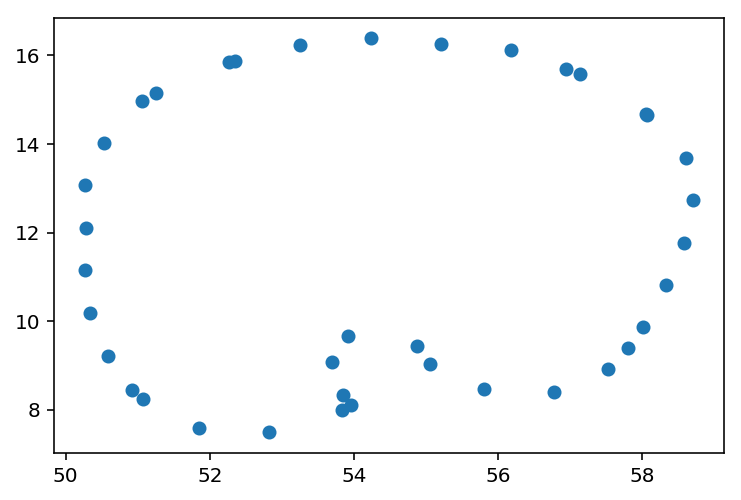

In [52]:
plt.scatter(x=sequence[0::3], y=sequence[1::3])

In [15]:
def sort_files(filename):
    scan_type, patient_id, image_name, extenstion = filename.split('.')
    if '_' in image_name:
        image_name, image_subid = image_name.split('_')
        _, image_id = image_name.split()
        return int(image_subid), int(image_id)
    else:
        _, image_id = image_name.split()
        return 0, int(image_id)

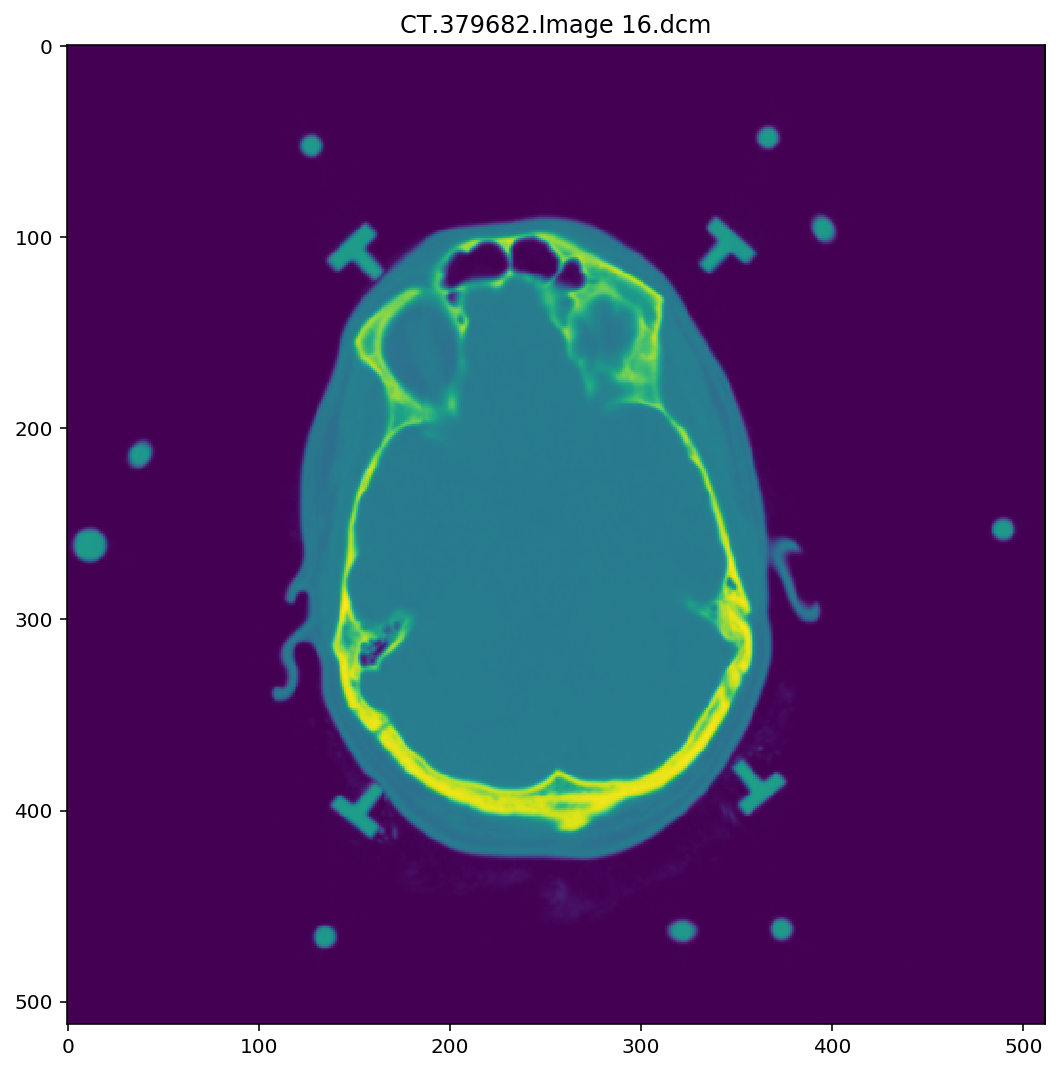

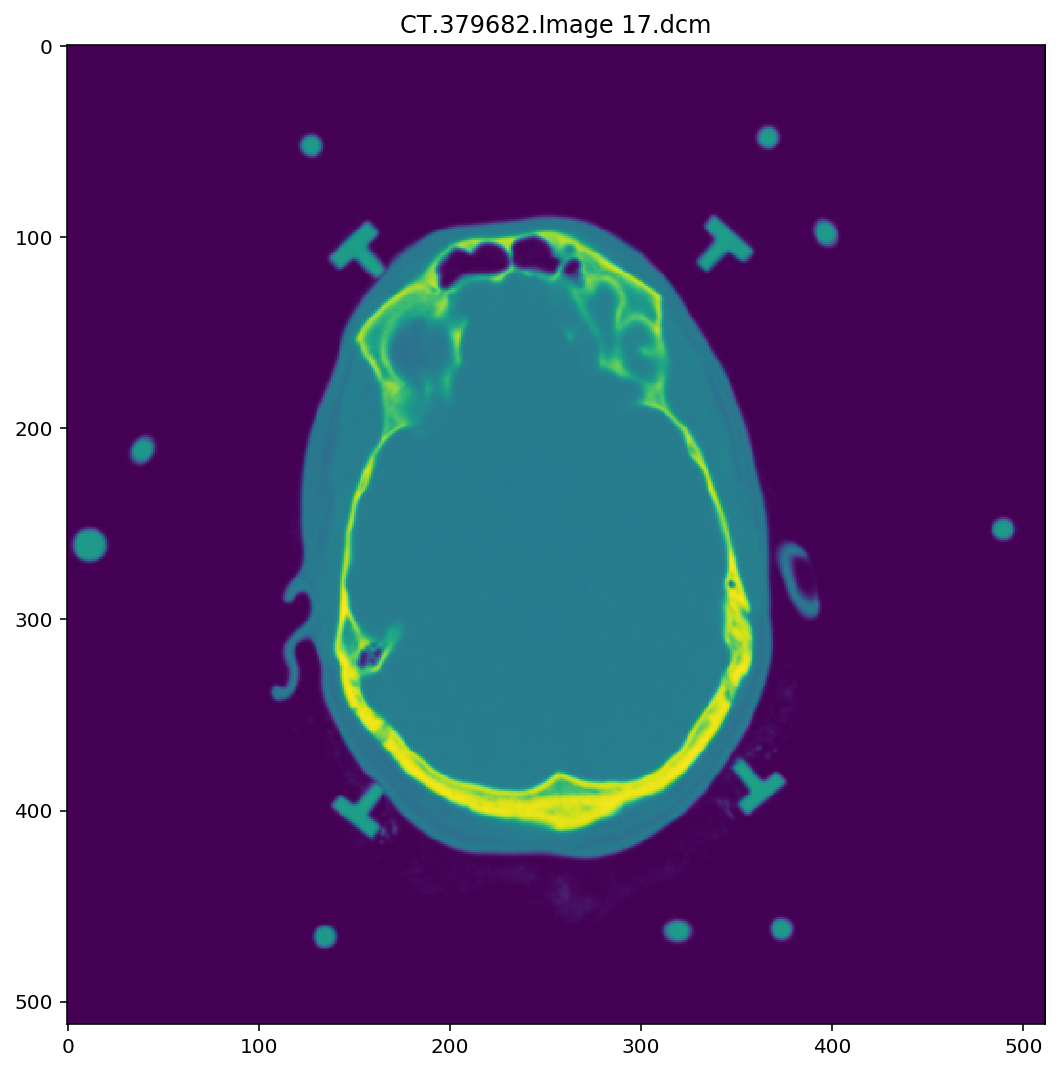

In [21]:
dicoms = [x for x in os.listdir(data_path / '379682') if x.startswith('CT')]
for filename in list(sorted(dicoms, key=sort_files))[15:17]:
    dicom = pydicom.read_file(str(data_path / '379682' / filename))
    plt.figure(figsize=(9, 9))
    plt.title(filename)
    plt.imshow(dicom.pixel_array);

In [25]:
list(sorted(os.listdir(data_path / '379682')))

['CT.379682.Image 1.dcm',
 'CT.379682.Image 10.dcm',
 'CT.379682.Image 10_0001.dcm',
 'CT.379682.Image 10_0002.dcm',
 'CT.379682.Image 10_0003.dcm',
 'CT.379682.Image 10_0004.dcm',
 'CT.379682.Image 11.dcm',
 'CT.379682.Image 11_0001.dcm',
 'CT.379682.Image 11_0002.dcm',
 'CT.379682.Image 11_0003.dcm',
 'CT.379682.Image 11_0004.dcm',
 'CT.379682.Image 12.dcm',
 'CT.379682.Image 12_0001.dcm',
 'CT.379682.Image 12_0002.dcm',
 'CT.379682.Image 12_0003.dcm',
 'CT.379682.Image 12_0004.dcm',
 'CT.379682.Image 13.dcm',
 'CT.379682.Image 13_0001.dcm',
 'CT.379682.Image 13_0002.dcm',
 'CT.379682.Image 13_0003.dcm',
 'CT.379682.Image 13_0004.dcm',
 'CT.379682.Image 14.dcm',
 'CT.379682.Image 14_0001.dcm',
 'CT.379682.Image 14_0002.dcm',
 'CT.379682.Image 14_0003.dcm',
 'CT.379682.Image 14_0004.dcm',
 'CT.379682.Image 15.dcm',
 'CT.379682.Image 15_0001.dcm',
 'CT.379682.Image 15_0002.dcm',
 'CT.379682.Image 15_0003.dcm',
 'CT.379682.Image 15_0004.dcm',
 'CT.379682.Image 16.dcm',
 'CT.379682.Image

In [62]:
dicoms = [x for x in os.listdir(data_path / '339663') if x.startswith('CT')]
dicoms.sort()
len(dicoms)

77

In [19]:
dicom = pydicom.read_file(str(data_path / '../data/379682/MR.379682.Image 8.dcm'))

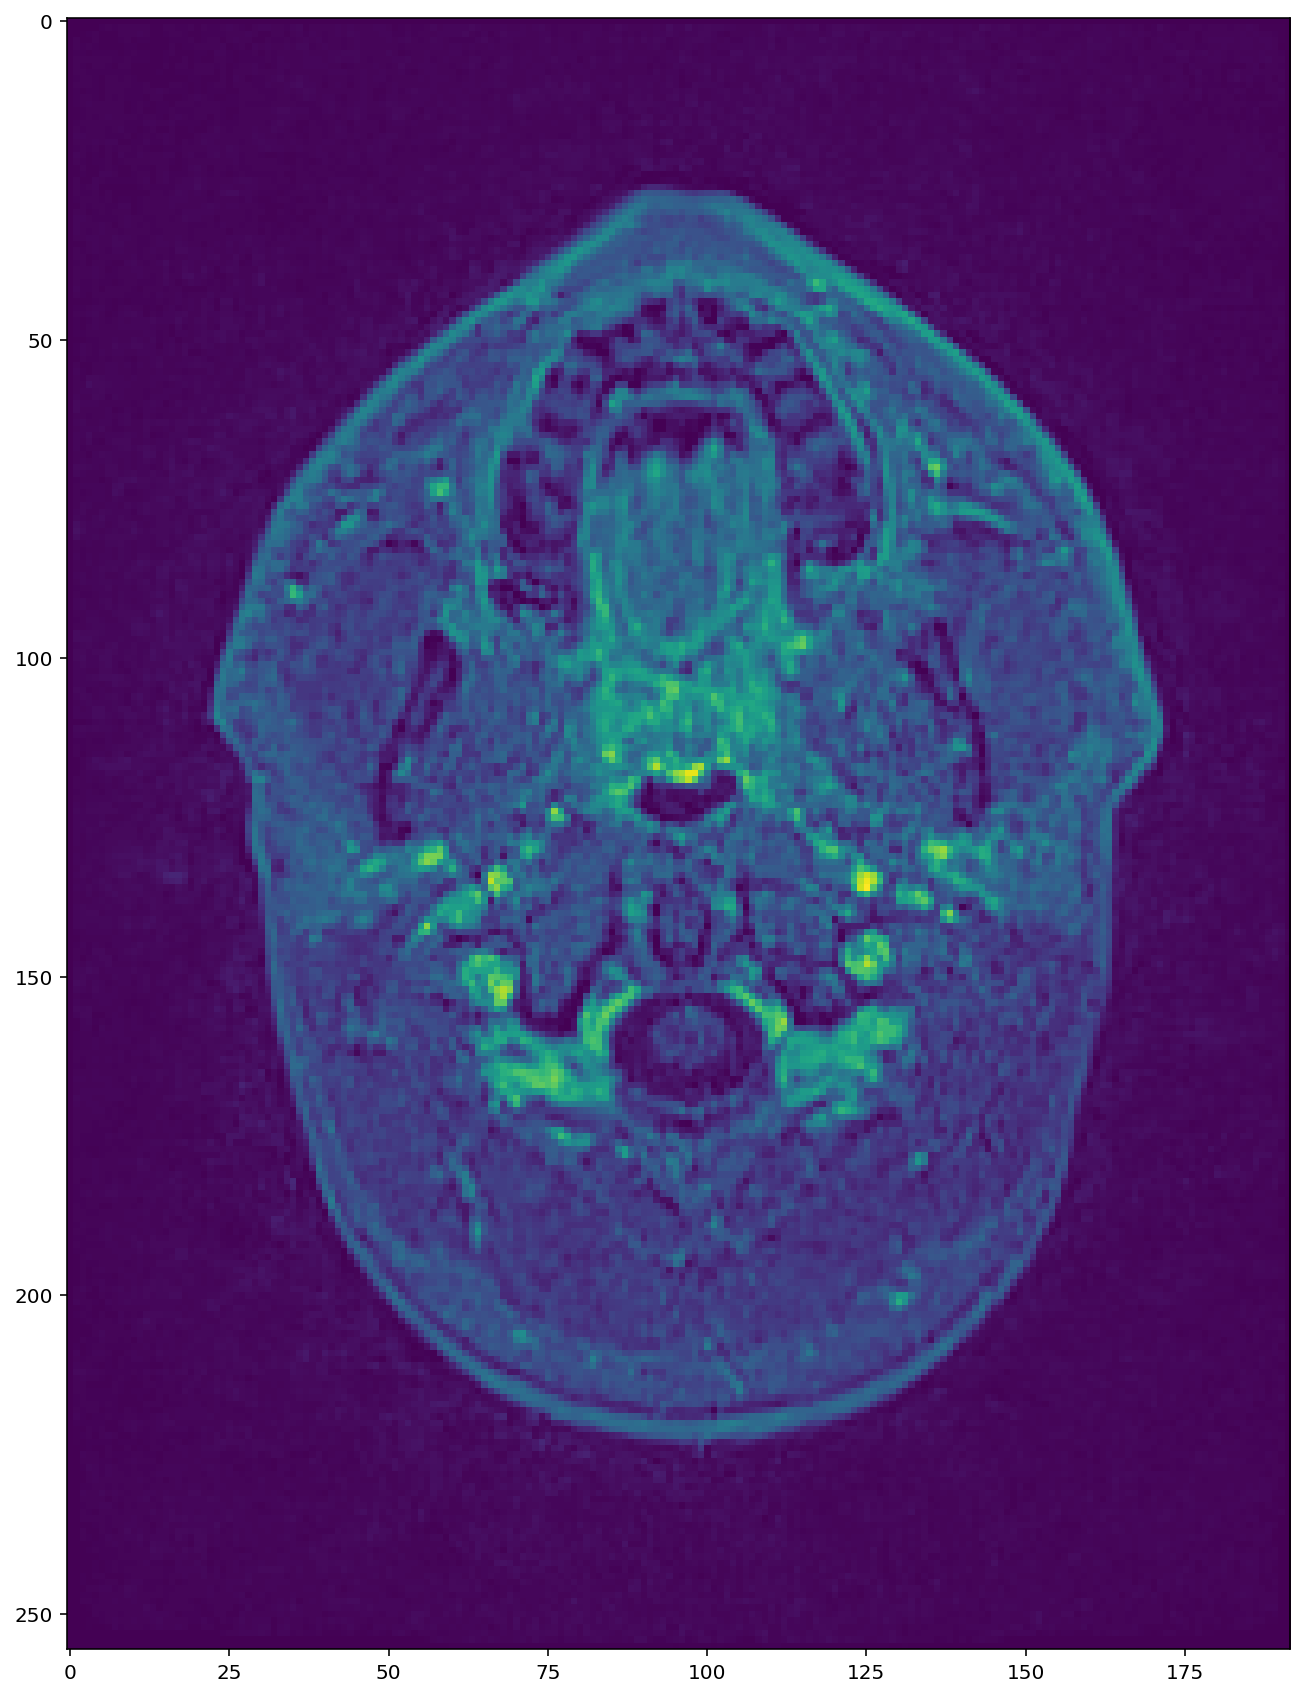

In [20]:
plt.figure(figsize=(15, 15))
plt.imshow(dicom.pixel_array);

In [21]:
dicom.Modality

'MR'

In [77]:
dicom = pydicom.read_file(str(data_path / '../data/379682/MR.379682.Image 8_0001.dcm'))

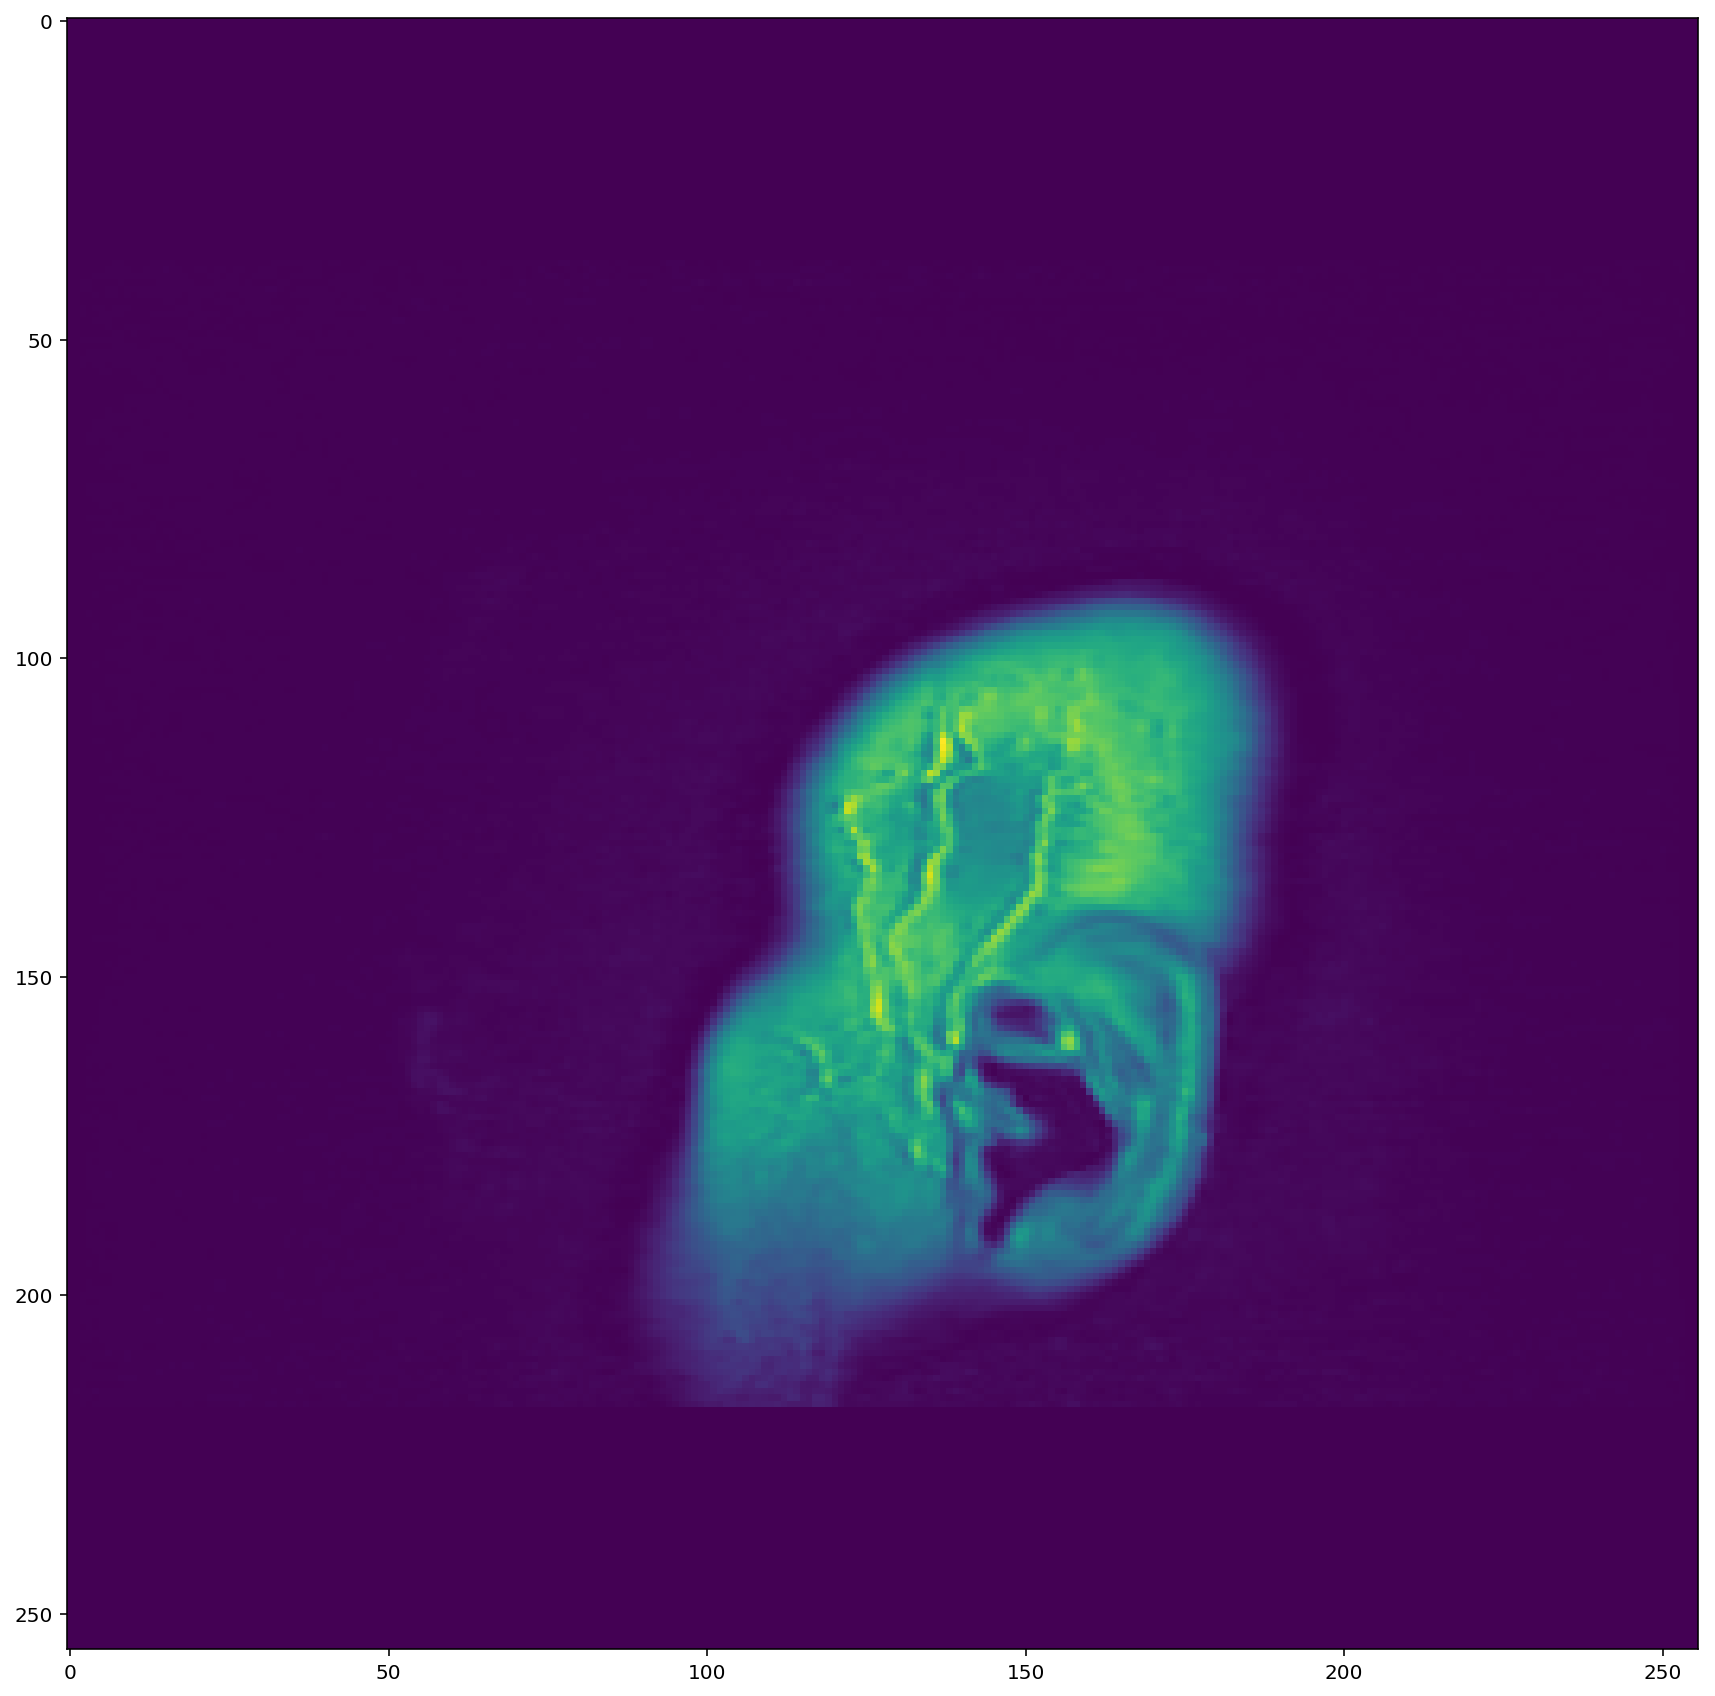

In [78]:
plt.figure(figsize=(15, 15))
plt.imshow(dicom.pixel_array);

In [91]:
dicom = pydicom.read_file(str(data_path / '../data/379682/CT.379682.Image 8.dcm'))

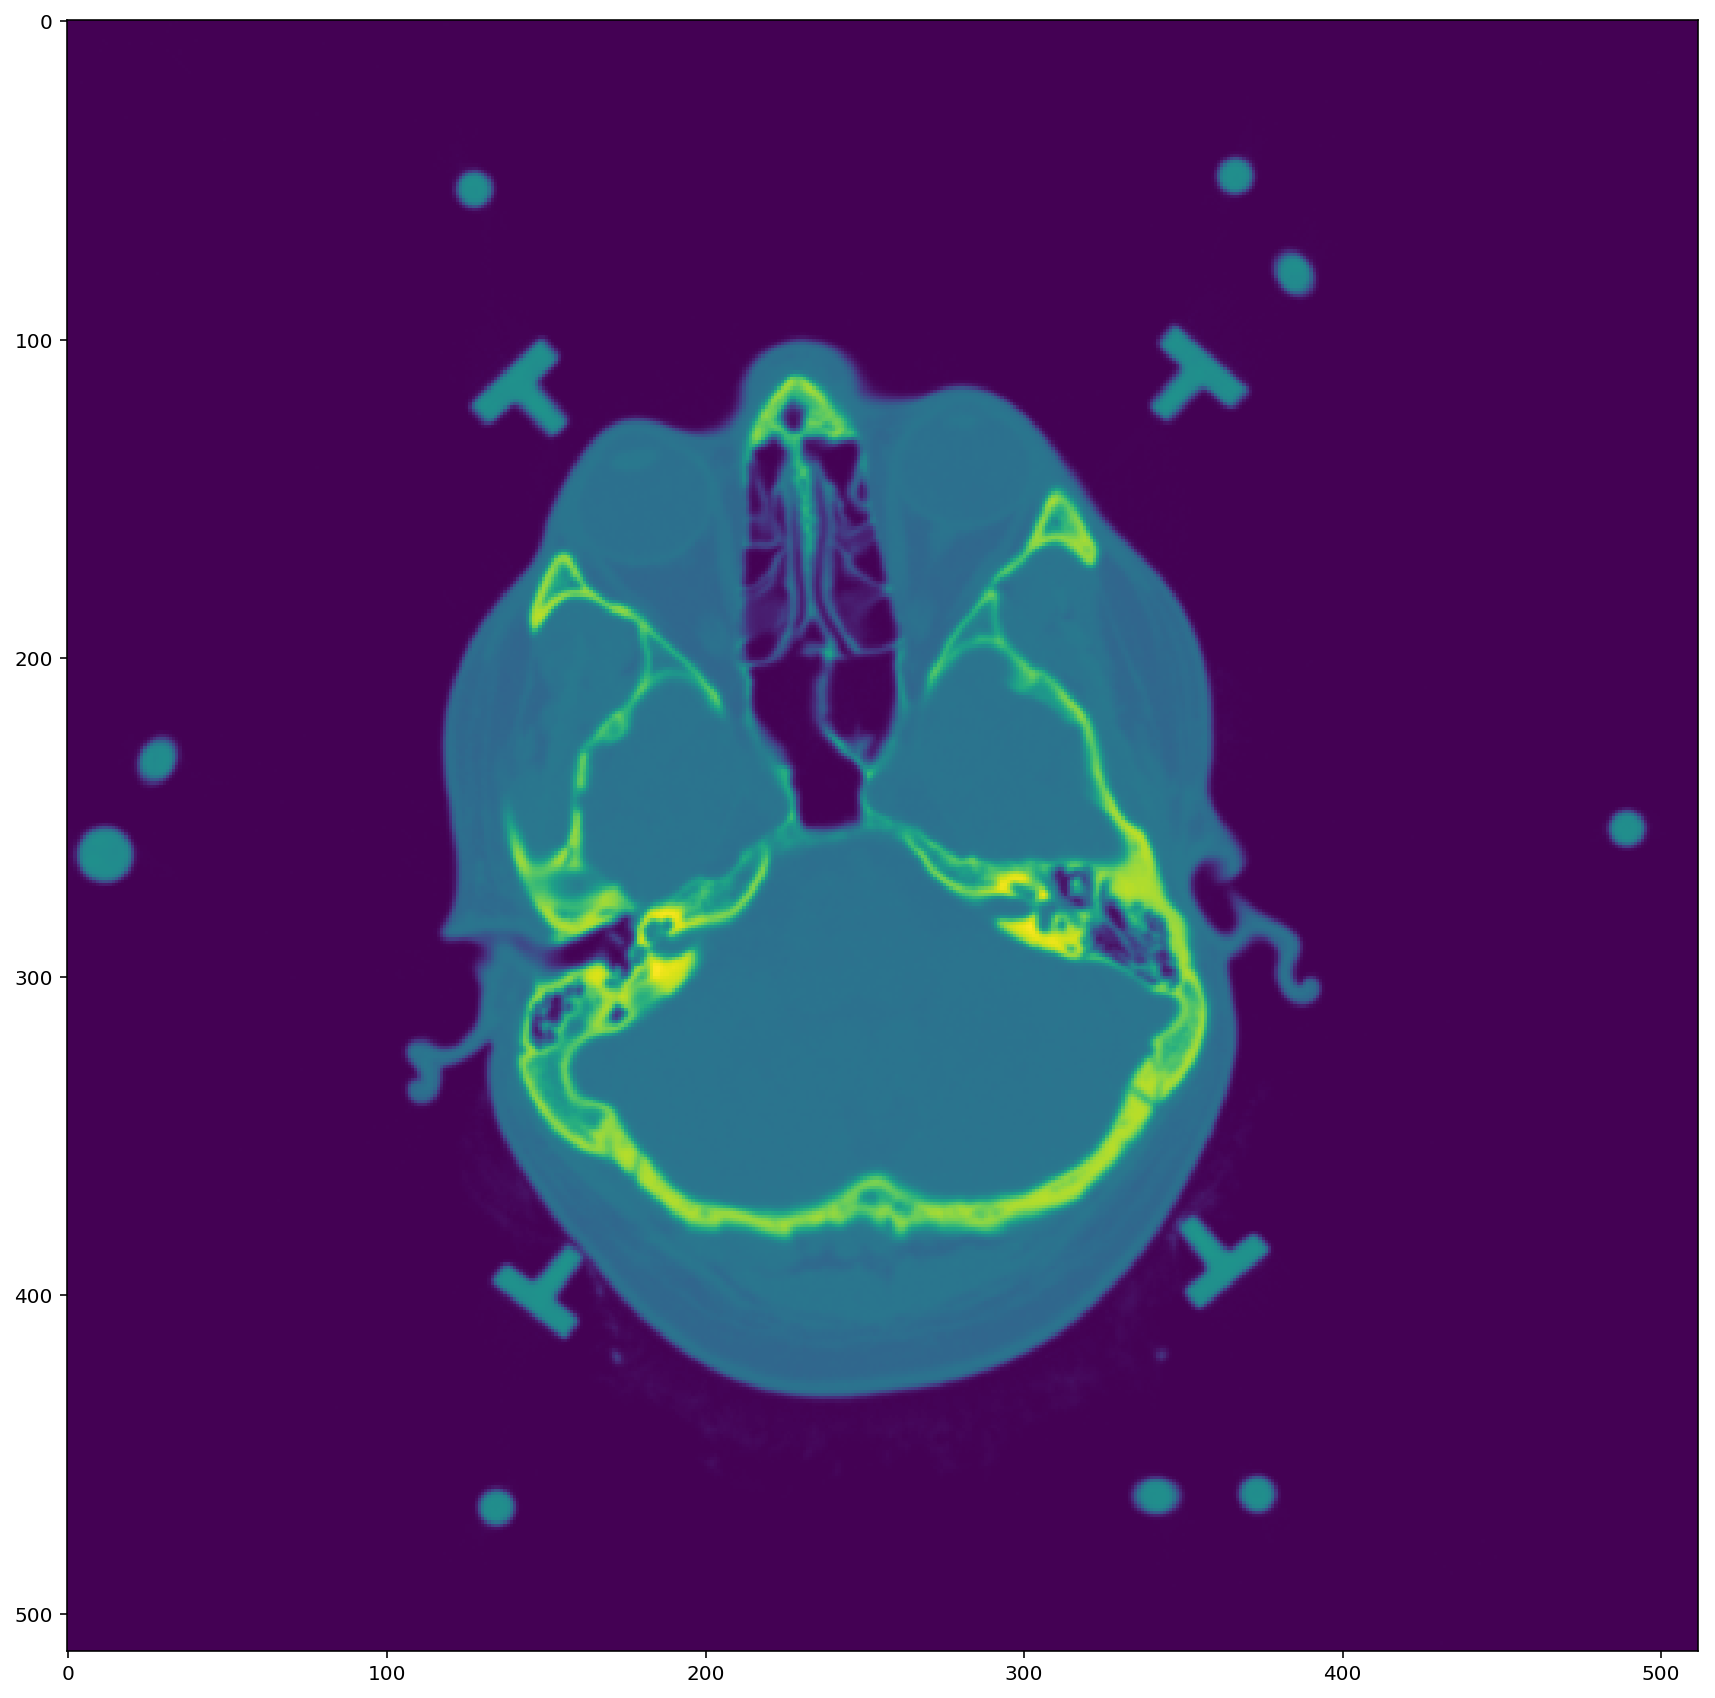

In [92]:
plt.figure(figsize=(15, 15))
plt.imshow(dicom.pixel_array);

In [93]:
dicom = pydicom.read_file(str(data_path / '../data/379682/CT.379682.Image 8_0001.dcm'))

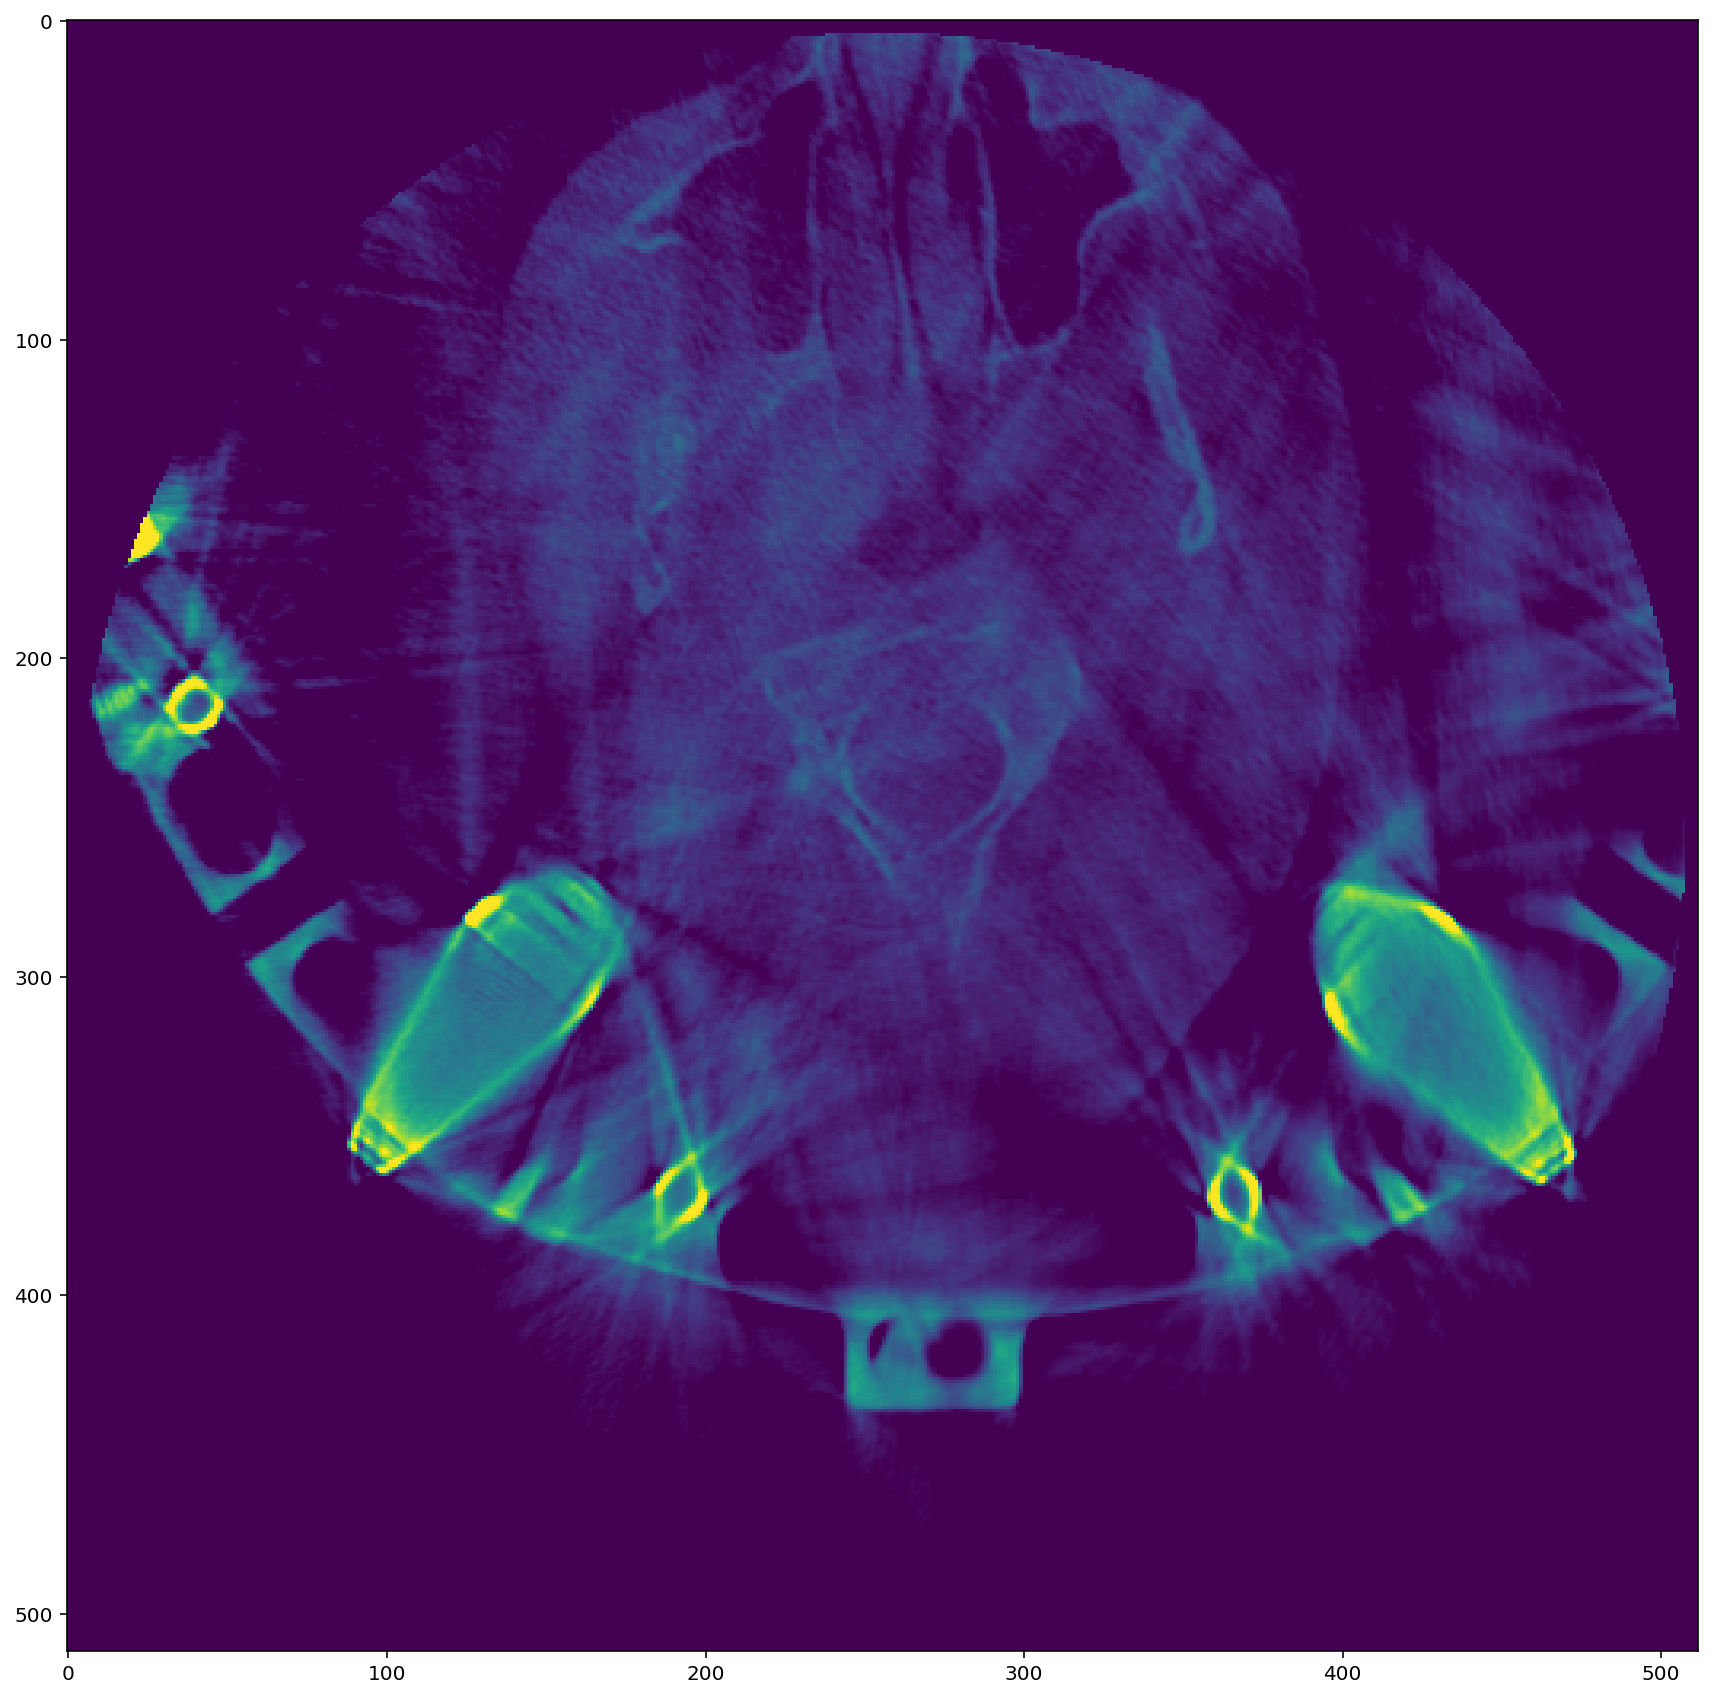

In [94]:
plt.figure(figsize=(15, 15))
plt.imshow(dicom.pixel_array);

In [95]:
dicom = pydicom.read_file(str(data_path / '../data/379682/CT.379682.Image 8_0002.dcm'))

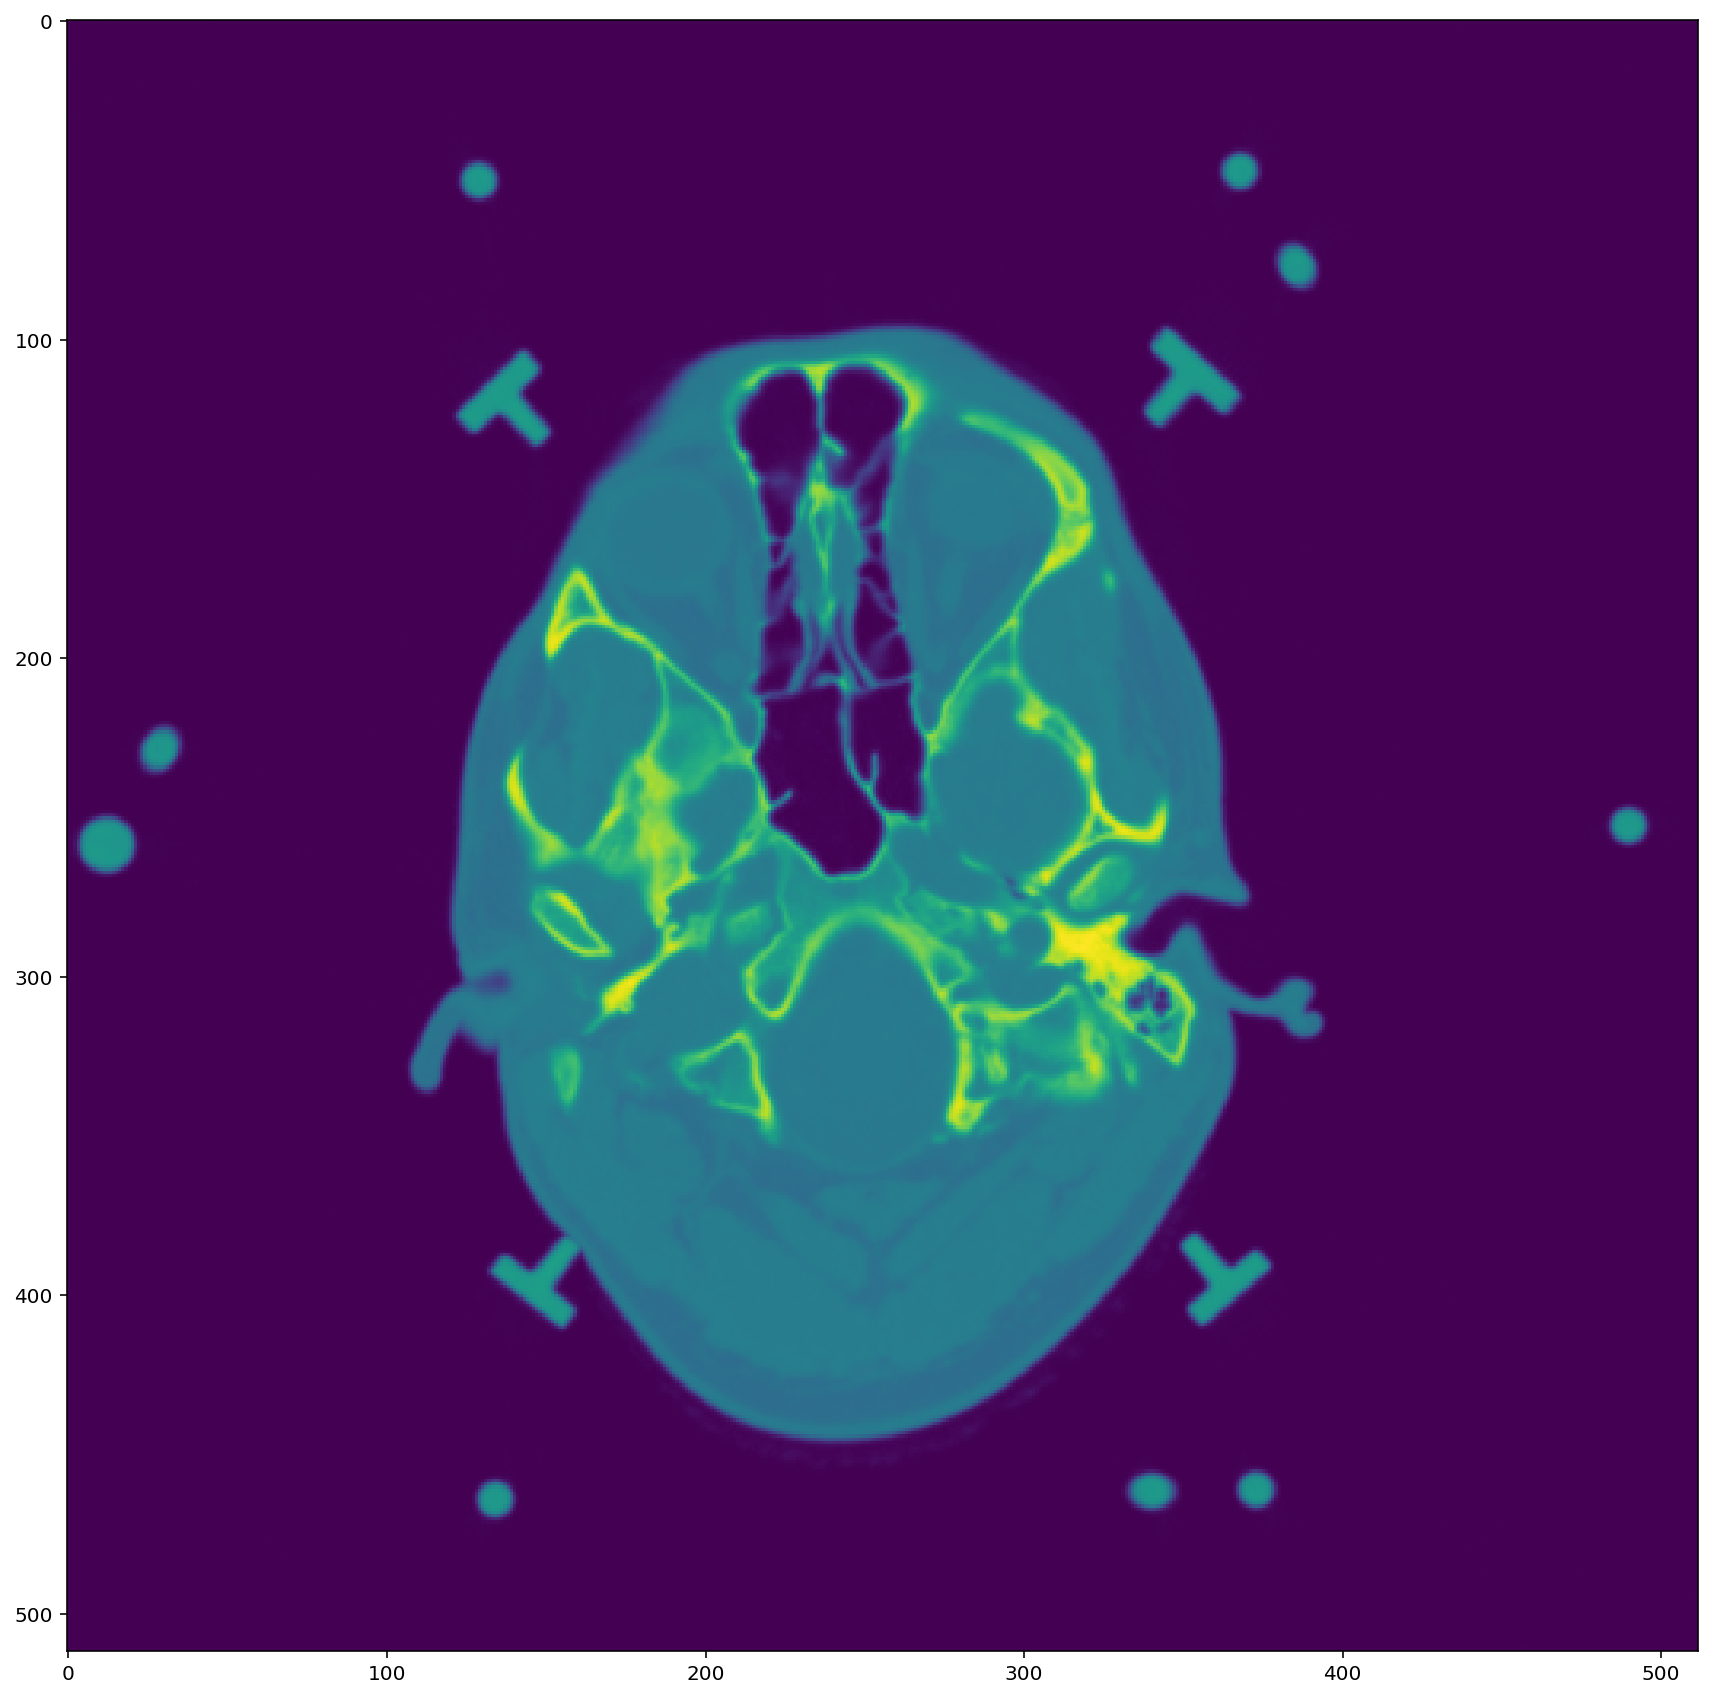

In [96]:
plt.figure(figsize=(15, 15))
plt.imshow(dicom.pixel_array);

In [104]:
dicom = pydicom.read_file(str(data_path / '../data/379682/CT.379682.Image 9.dcm'))

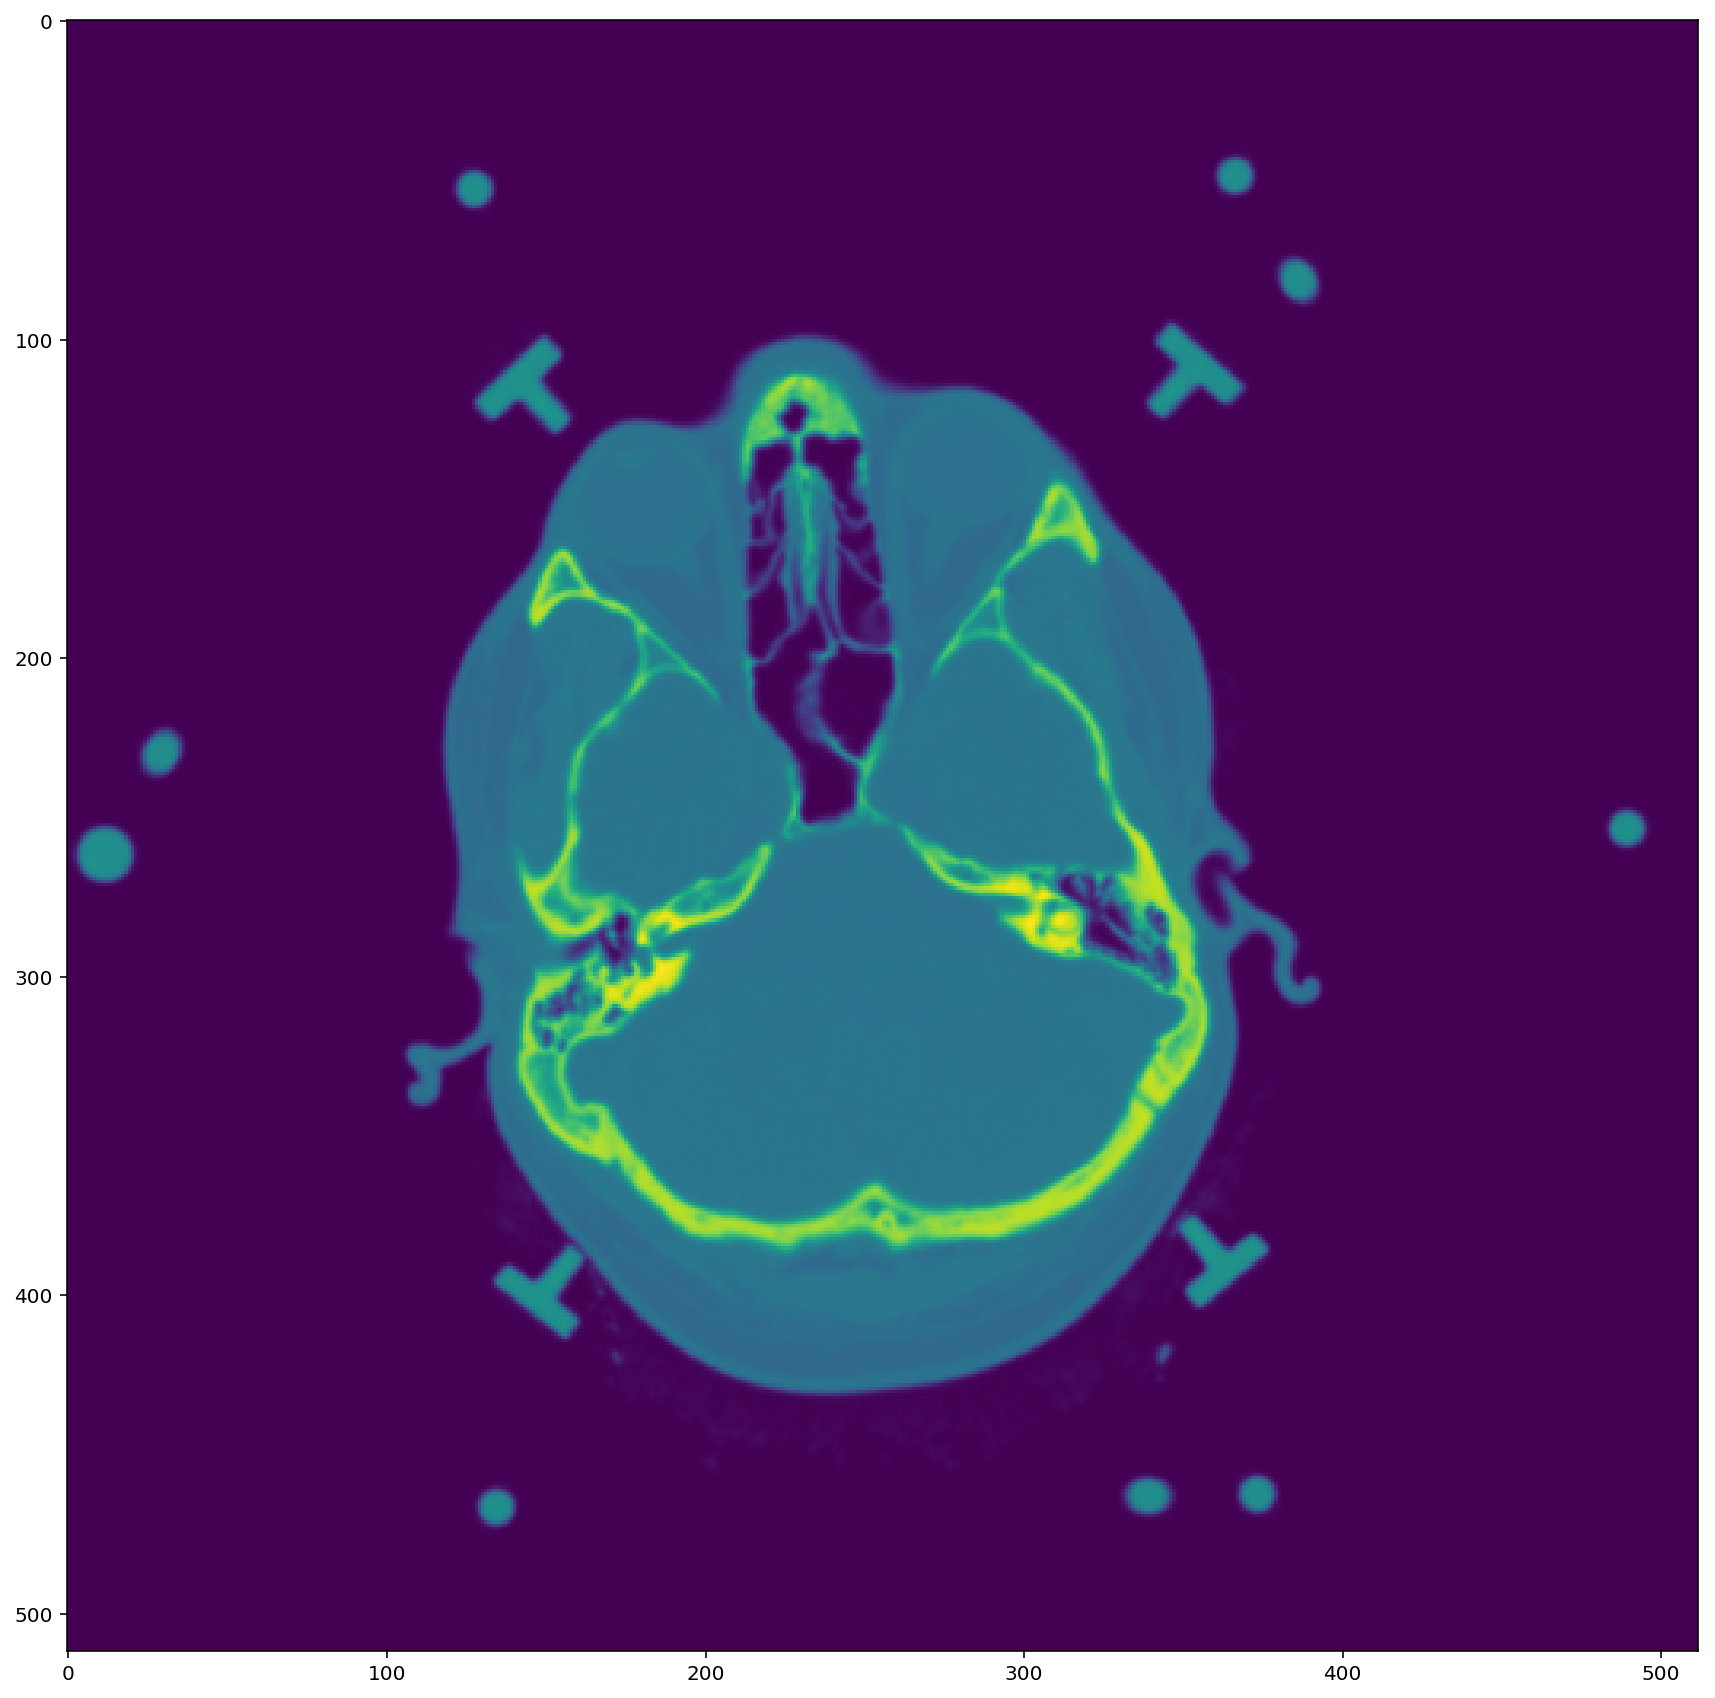

In [105]:
plt.figure(figsize=(15, 15))
plt.imshow(dicom.pixel_array);

In [12]:
dicoms = [x for x in os.listdir(data_path / '379682') if x.startswith('RI')]

In [14]:
list(sorted(dicoms))

['RI.379682.CBCT-NA.dcm',
 'RI.379682.CBCT-NA_0001.dcm',
 'RI.379682.CBCT-NA_0002.dcm',
 'RI.379682.CBCT-NA_0003.dcm',
 'RI.379682.CBCT-NA_0004.dcm',
 'RI.379682.CBCT-NA_0005.dcm',
 'RI.379682.SET-AP-NA.dcm',
 'RI.379682.SET-AP-NA_0001.dcm',
 'RI.379682.SET-AP-NA_0002.dcm',
 'RI.379682.SET-AP-NA_0003.dcm',
 'RI.379682.SET-AP-NA_0004.dcm',
 'RI.379682.SET-AP-NA_0005.dcm',
 'RI.379682.SET-LAT-NA.dcm',
 'RI.379682.SET-LAT-NA_0001.dcm',
 'RI.379682.SET-LAT-NA_0002.dcm',
 'RI.379682.SET-LAT-NA_0003.dcm',
 'RI.379682.SET-LAT-NA_0004.dcm',
 'RI.379682.SET-LAT-NA_0005.dcm',
 'RI.379682.a0g90-270-NA.dcm',
 'RI.379682.a0g90-270-NA_0001.dcm',
 'RI.379682.a0g90-270-NA_0002.dcm',
 'RI.379682.a0g90-270-NA_0003.dcm',
 'RI.379682.a0g90-270-NA_0004.dcm',
 'RI.379682.a0g90-270-NA_0005.dcm',
 'RI.379682.a270g130-0-NA.dcm',
 'RI.379682.a270g130-0-NA_0001.dcm',
 'RI.379682.a270g130-0-NA_0002.dcm',
 'RI.379682.a270g130-0-NA_0003.dcm',
 'RI.379682.a270g130-0-NA_0004.dcm',
 'RI.379682.a270g130-0-NA_0005.dcm',